## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import percentileofscore
from datetime import datetime

Configs

In [2]:
pd.set_option('display.precision', 2)

## Data Loading

In [3]:
df = pd.read_csv('data/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.20,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.20,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.79,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.51,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.20,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


Multiple dates there but different locations. Seems like the data comprises of cases for each dates and location

Data shape

In [4]:
df.shape

(21759, 38)

Wow lots of entries

Looking at some basic info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

There's quite a lot of null values \
We might have to clean it later

Let's convert the 'Date' feature from object to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

## Data Cleaning

We had quite a lot of null values up there

In [7]:
df[df.columns[(df.isna().any())]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City or Regency              0 non-null      float64
 1   Province                     21117 non-null  object 
 2   Island                       21117 non-null  object 
 3   Time Zone                    21117 non-null  object 
 4   Special Status               3123 non-null   object 
 5   Total Cities                 21145 non-null  float64
 6   Total Urban Villages         21142 non-null  float64
 7   Total Rural Villages         21117 non-null  float64
 8   Growth Factor of New Cases   20572 non-null  float64
 9   Growth Factor of New Deaths  19292 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.7+ MB


I'm gonna drop all these features

In [8]:
df = df.dropna(axis=1)
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.84,-6.20,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.84,-6.20,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.92,-0.79,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,...,69.80,101.81,0.51,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.84,-6.20,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%


There were multiple dates with different location code. Let's check what codes we have

In [9]:
print(df['Location ISO Code'].unique())
print(df['Location ISO Code'].nunique(), 'unique values of Location ISO code')

['ID-JK' 'IDN' 'ID-RI' 'ID-JB' 'ID-BT' 'ID-JT' 'ID-SG' 'ID-BA' 'ID-KI'
 'ID-YO' 'ID-SU' 'ID-JI' 'ID-KR' 'ID-SN' 'ID-JA' 'ID-MA' 'ID-PA' 'ID-MU'
 'ID-SS' 'ID-AC' 'ID-KT' 'ID-LA' 'ID-ST' 'ID-SA' 'ID-SB' 'ID-PB' 'ID-KU'
 'ID-SR' 'ID-KB' 'ID-KS' 'ID-BB' 'ID-BE' 'ID-NB' 'ID-NT' 'ID-GO']
35 unique values of Location ISO code


In [10]:
df['Location Level'].unique()

array(['Province', 'Country'], dtype=object)

Yup we definitely have data for each region. I see that there's an 'IDN' over there, which is the ISO code for 'Indonesia'. Seems like that one is to identify cases for the whole country, while the rest is on a provincial scale

We're gonna separate the df for country level and province level

In [11]:
df_idn = df[df['Location Level'] == 'Country'].sort_values(by='Date').reset_index(drop=True)
df_provs = df[df['Location Level'] == 'Province'].sort_values(by=['Location ISO Code', 'Date']).reset_index(drop=True)

print(df_idn.shape)
print(df_provs.shape)

(642, 28)
(21117, 28)


## Data Exploration

Let's look at some basic stats

In [12]:
df_idn.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb
count,642.00,642.00,642.00,642.00,6.42e+02,642.00,6.42e+02,642.00,642.0,642.0,6.42e+02,6.42e+02,642.00,6.42e+02,642.00,642.00,642.00,642.00,642.00,642.00
mean,6631.22,224.08,6395.14,12.00,1.45e+06,44763.92,1.30e+06,100661.91,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,25.01,5457.41,0.85,168.80,16.88
std,9556.02,359.86,9052.20,4862.28,1.52e+06,49183.59,1.43e+06,119600.85,0.0,0.0,0.00e+00,0.00e+00,0.00,1.42e-14,0.00,36.04,5713.98,1.36,185.47,18.55
min,0.00,0.00,0.00,-25725.00,2.00e+00,0.00,0.00e+00,2.00,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,0.00,0.01,0.00,0.00,0.00
25%,1044.25,47.25,889.75,-619.75,1.26e+05,5733.50,8.13e+04,22633.75,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,3.94,474.45,0.18,21.62,2.16
50%,4070.50,112.00,3855.00,118.50,9.02e+05,25877.00,7.32e+05,63252.50,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,15.35,3402.47,0.42,97.59,9.76
75%,6737.75,193.75,6976.75,639.75,2.09e+06,56639.50,1.84e+06,123868.00,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,25.41,7876.33,0.73,213.58,21.36
max,56757.00,2069.00,48832.00,36726.00,4.26e+06,143858.00,4.11e+06,574135.00,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,214.03,16053.83,7.80,542.48,54.25


In [13]:
df_provs.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb
count,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,2.11e+04,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00
mean,201.59,6.81,194.36,0.42,43853.42,1367.89,39467.44,3018.09,12.25,213.42,56345.86,7.89e+06,763.43,113.67,-2.79,29.53,6205.73,0.85,163.38,16.34
std,665.41,26.52,704.12,432.90,110094.28,3727.12,103545.21,8044.88,7.37,169.36,60153.38,1.09e+07,2782.53,10.01,3.65,70.71,10394.99,2.30,256.00,25.60
min,0.00,0.00,0.00,-15797.00,1.00,0.00,0.00,-2306.00,1.00,44.00,664.00,6.48e+05,8.59,96.91,-8.68,0.00,0.02,0.00,0.00,0.00
25%,6.00,0.00,4.00,-15.00,1685.00,46.00,949.00,172.00,7.00,103.00,16787.00,2.00e+06,47.79,106.11,-6.20,1.70,413.32,0.00,10.60,1.06
50%,38.00,1.00,29.00,0.00,10245.00,261.00,8167.00,849.00,11.00,169.00,38744.00,4.22e+06,103.84,112.73,-2.99,8.00,2706.83,0.16,73.18,7.32
75%,133.00,4.00,126.00,25.00,34118.00,949.00,30240.00,2398.00,15.00,241.00,72981.00,8.22e+06,262.70,121.20,0.21,26.30,7364.18,0.75,195.47,19.55
max,14622.00,544.00,20602.00,9537.00,864045.00,30225.00,849875.00,118018.00,29.00,666.00,319036.00,4.52e+07,16334.31,138.70,4.23,1348.13,79663.79,63.80,1533.98,153.40


In [14]:
df_idn.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level', 'Country',
       'Continent', 'Total Regencies', 'Total Districts', 'Area (km2)',
       'Population', 'Population Density', 'Longitude', 'Latitude',
       'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate'],
      dtype='object')

Looking at the features, seems like there are 4 features for daily changes of data, which are

In [15]:
col_daily = df_idn.columns[3:7]
col_daily

Index(['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases'], dtype='object')

For now, let's focus our EDA on these 4 datas first

### Measure of Central Tendency

Consists of
- Mean
- Median
- Mode

#### Mean

In [16]:
df_idn[col_daily].mean()

New Cases           6631.22
New Deaths           224.08
New Recovered       6395.14
New Active Cases      12.00
dtype: float64

In [17]:
df_provs.groupby(by='Location')[col_daily].mean()

,New Cases,New Deaths,New Recovered,New Active Cases
Location,,,,
Aceh,62.26,3.35,58.89,2.76e-02
Bali,180.75,6.40,174.05,2.96e-01
Banten,208.31,4.21,203.77,3.31e-01
Bengkulu,37.81,0.77,37.01,3.27e-02
DKI Jakarta,1345.81,21.15,1323.73,9.31e-01
Daerah Istimewa Yogyakarta,250.03,8.39,240.77,8.64e-01
Gorontalo,20.02,0.78,19.24,5.08e-03
Jambi,47.78,1.27,46.50,1.77e-02
Jawa Barat,1106.15,23.03,1081.40,1.73e+00


#### Median

In [18]:
df_idn[col_daily].median()

New Cases           4070.5
New Deaths           112.0
New Recovered       3855.0
New Active Cases     118.5
dtype: float64

In [19]:
df_provs.groupby(by='Location')[col_daily].median()

,New Cases,New Deaths,New Recovered,New Active Cases
Location,,,,
Aceh,20.0,1.0,8.0,0.0
Bali,88.0,2.0,59.5,6.5
Banten,72.0,2.0,64.0,4.0
Bengkulu,11.0,0.0,12.0,0.0
DKI Jakarta,734.0,13.0,690.0,20.5
Daerah Istimewa Yogyakarta,79.0,2.0,73.0,0.0
Gorontalo,6.0,0.0,6.0,0.0
Jambi,19.0,0.0,15.0,0.0
Jawa Barat,506.5,6.0,456.0,11.0


#### Mode

In [20]:
df_idn[col_daily].mode()

,New Cases,New Deaths,New Recovered,New Active Cases
0,0,0,0,0


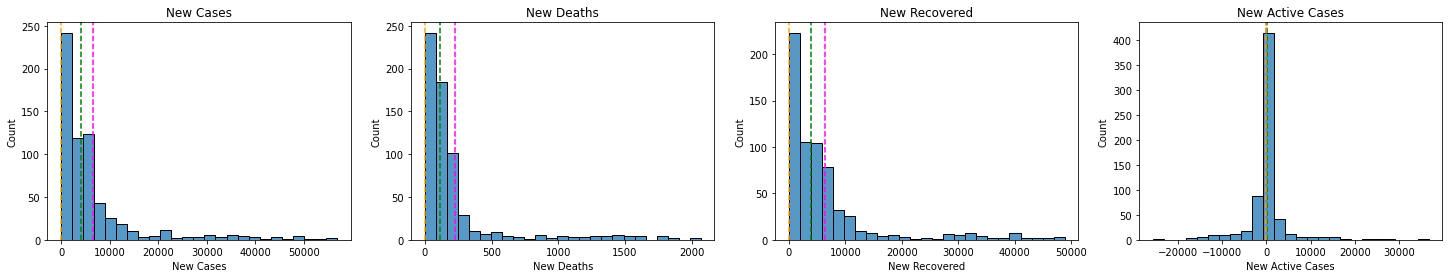

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(25, 4))
for i, col in enumerate(col_daily):
    # ax[i].hist(df_idn[col], bins=25)
    sns.histplot(df_idn[col], bins=25, ax=ax[i])
    ax[i].set_title(col)
    ax[i].axvline(df_idn[col].mean(), color='magenta', linestyle='dashed')
    ax[i].axvline(df_idn[col].median(), color='green', linestyle='dashed')
    ax[i].axvline(df_idn[col].mode().iloc[0], color='orange', linestyle='dashed')

plt.show()

Notes:
- Magenta line: mean
- Green line: median
- Orange line: mode

For `New Cases`, `New Deaths`, and `New Recovered` the mean is relatively higher than the median which means the data is right-skewed

For `New Active Cases`, the data is more of a normal distribuation with the mean, median, and mode relatively close to each other


### Measure of Variance

Consists of
- Range
- Percentiles
- Quartiles
- Variance

#### Range

In [22]:
df_idn[col_daily].max() - df_idn[col_daily].min()

New Cases           56757
New Deaths           2069
New Recovered       48832
New Active Cases    62451
dtype: int64

In [23]:
df_provs.groupby(by='Location')[col_daily].max() - df_provs.groupby(by='Location')[col_daily].min()

,New Cases,New Deaths,New Recovered,New Active Cases
Location,,,,
Aceh,459,30,1035,1088
Bali,1910,269,8184,9070
Banten,4016,177,8040,10274
Bengkulu,520,25,480,653
DKI Jakarta,14622,268,20602,21687
Daerah Istimewa Yogyakarta,2732,104,3377,4388
Gorontalo,278,16,231,321
Jambi,567,26,788,986
Jawa Barat,10678,467,18555,20906


#### Percentiles

Where does Jakarta's 'New Cases' mean rank within the whole Indonesia's cases

In [24]:
percentileofscore(
    df_provs['New Cases'],
    df_provs[df_provs['Location ISO Code'] == 'ID-JK']['New Cases'].mean(),
    'strict'
)

97.25813325756499

#### Quartiles

In [25]:
df_idn[col_daily].quantile([0.25, 0.5, 0.75])

,New Cases,New Deaths,New Recovered,New Active Cases
0.25,1044.25,47.25,889.75,-619.75
0.50,4070.50,112.00,3855.00,118.50
0.75,6737.75,193.75,6976.75,639.75


#### Box plot

<AxesSubplot:>

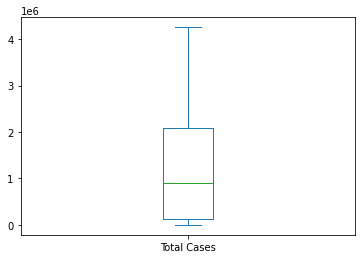

In [26]:
df_idn['Total Cases'].plot(kind='box')

#### Variance

In [27]:
df_idn[col_daily].var()

New Cases           9.13e+07
New Deaths          1.29e+05
New Recovered       8.19e+07
New Active Cases    2.36e+07
dtype: float64

#### Standard Deviation

In [28]:
df_idn[col_daily].std()

New Cases           9556.02
New Deaths           359.86
New Recovered       9052.20
New Active Cases    4862.28
dtype: float64